# **1. Importing Libraries**

In [176]:
import os

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from PIL import Image

# **2. Data Gathering**

In [177]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [178]:
training_set = train_datagen.flow_from_directory('/kaggle/input/intel-image-classification/seg_train/seg_train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32)
test_set = test_datagen.flow_from_directory('/kaggle/input/intel-image-classification/seg_test/seg_test',
                                                target_size = (64, 64),
                                                 batch_size = 32)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# **3. EDA**

## **1. Finding Dataset variation**

# **4. Model creation**

**1. Creating Model**

In [179]:
X_model=Sequential()

X_model.add(
    Convolution2D(32,(3,3),
    input_shape=(64,64,3),
    activation="relu")
)
X_model.add(MaxPooling2D(pool_size=(2,2)))
X_model.add(Flatten())
X_model.add(Dense(3000,activation="relu"))
X_model.add(Dense(units=6,activation="softmax"))

In [180]:
X_model.summary()

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_251 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_135 (Flatten)       (None, 30752)             0         
                                                                 
 dense_270 (Dense)           (None, 3000)              92259000  
                                                                 
 dense_271 (Dense)           (None, 6)                 18006     
                                                                 
Total params: 92,277,902
Trainable params: 92,277,902
Non-trainable params: 0
________________________________________

**2. Compiling Model**

In [181]:
X_model.compile(optimizer= "adam", loss= "categorical_crossentropy", metrics= ["accuracy"])

**3. Fitting Model**

In [182]:
fit_model = X_model.fit(
    training_set,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = test_set,
    validation_steps = 100
)

Epoch 1/20
100/100 [==============================] - 13s 120ms/step - loss: 3.0068 - accuracy: 0.4850 - val_loss: 1.1637 - val_accuracy: 0.5947
Epoch 2/20
100/100 [==============================] - 8s 81ms/step - loss: 0.9874 - accuracy: 0.6313
Epoch 3/20
100/100 [==============================] - 8s 84ms/step - loss: 0.9368 - accuracy: 0.6488
Epoch 4/20
100/100 [==============================] - 8s 80ms/step - loss: 0.8694 - accuracy: 0.6716
Epoch 5/20
100/100 [==============================] - 8s 84ms/step - loss: 0.8328 - accuracy: 0.6891
Epoch 6/20
100/100 [==============================] - 8s 82ms/step - loss: 0.8384 - accuracy: 0.6869
Epoch 7/20
100/100 [==============================] - 9s 87ms/step - loss: 0.7801 - accuracy: 0.7116
Epoch 8/20
100/100 [==============================] - 8s 79ms/step - loss: 0.7859 - accuracy: 0.7097
Epoch 9/20
100/100 [==============================] - 8s 83ms/step - loss: 0.7648 - accuracy: 0.7228
Epoch 10/20
100/100 [==========================

# **5. Model Evaluation**

In [183]:
x_model_evaluation = X_model.evaluate(test_set)

94/94 [==============================] - 4s 42ms/step - loss: 0.8031 - accuracy: 0.7337


In [184]:
print(f"Model Accuracy :", x_model_evaluation[1])
print(f"Model Loss :", x_model_evaluation[0])

Model Accuracy : 0.7336666584014893
Model Loss : 0.8031437993049622


**1. Plotting Graph of Accuracy and Loss**

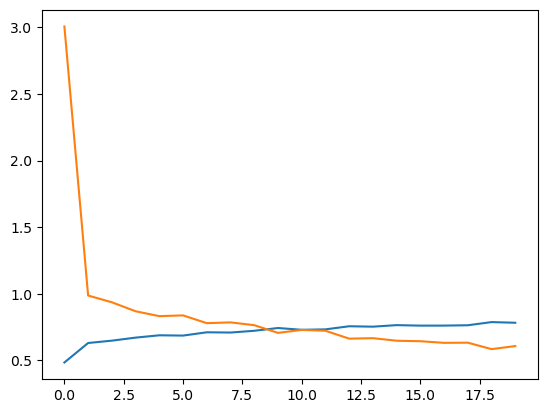

In [185]:
plt.plot([i for i in range(20)],fit_model.history["accuracy"])
plt.plot([i for i in range(20)],fit_model.history["loss"])

# **6. Saving Model**

In [186]:
X_model.save('path/to/save/X_model.h5')

# **7. Hyper parameter tuning**

**1. Setting Directory**

In [187]:
train_images_directory = "/kaggle/input/intel-image-classification/seg_train/seg_train"

**2. Catagorising Dataset**

In [188]:
categories = sorted(os.listdir(train_images_directory))

**3. Train test Split**

In [189]:
X_train = []
y_train = []

for category_index, category in enumerate(categories):
    category_directory = os.path.join(train_images_directory, category)

    for filename in os.listdir(category_directory):
        image_path = os.path.join(category_directory, filename)

        image = Image.open(image_path)
        image = image.resize((64, 64))
        image_array = np.array(image)

        X_train.append(image_array)

        y_train.append(category_index)

X_train = np.array(X_train)
y_train = np.array(y_train)

num_classes = len(categories)
y_train = np.eye(num_classes)[y_train]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [190]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

**4. Model Creation**

In [191]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
model.add(BatchNormalization())
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
350/350 [==============================] - 17s 42ms/step - loss: 1.4557 - accuracy: 0.4852 - val_loss: 1.1116 - val_accuracy: 0.5782
Epoch 2/10
350/350 [==============================] - 15s 41ms/step - loss: 1.2735 - accuracy: 0.5199 - val_loss: 1.0761 - val_accuracy: 0.6017
Epoch 3/10
350/350 [==============================] - 16s 45ms/step - loss: 1.1951 - accuracy: 0.5475 - val_loss: 1.0428 - val_accuracy: 0.6074
Epoch 4/10
350/350 [==============================] - 15s 41ms/step - loss: 1.1504 - accuracy: 0.5670 - val_loss: 1.0823 - val_accuracy: 0.5910
Epoch 5/10
350/350 [==============================] - 15s 43ms/step - loss: 1.1289 - accuracy: 0.5748 - val_loss: 0.9667 - val_accuracy: 0.6516
Epoch 6/10
350/350 [==============================] - 15s 42ms/step - loss: 1.1134 - accuracy: 0.5794 - val_loss: 0.9321 - val_accuracy: 0.6641
Epoch 7/10
350/350 [==============================] - 15s 44ms/step - loss: 1.0857 - accuracy: 0.5922 - val_loss: 1.0398 - val_accuracy:

In [192]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

def create_model(learning_rate=0.0001):
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(Convolution2D(64, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
    return model


model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {
    "learning_rate": [0.0001, 0.001, 0.01],
    "batch_size": [32, 64],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=5), verbose=1)

grid_result = grid.fit(X_train, y_train)

print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)


/tmp/ipykernel_28/581466145.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters:  {'batch_size': 64, 'learning_rate': 0.0001}
Best Score:  0.729223620891571


**5. Model Evaluation**

In [193]:
best_model = grid_result.best_estimator_.model

loss, accuracy = best_model.evaluate(X_val, y_val)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


88/88 [==============================] - 0s 4ms/step - loss: 0.9285 - accuracy: 0.7068
Test Loss: 0.9284805655479431
Test Accuracy: 0.7068043947219849


**6. Model sving**

In [194]:
best_model.save('path/to/save/model.h5')

# **8. Prediction of Image class**

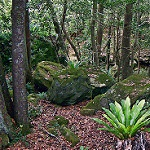

In [209]:
img_path = "/kaggle/input/intel-image-classification/seg_pred/seg_pred/10092.jpg"
imagee=Image.open(img_path)
imagee

In [210]:
def preprocess_images(img_path):
    img = image.load_img(img_path, target_size=(64, 64))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

In [211]:
loaded_model = tf.keras.models.load_model('/kaggle/working/path/to/save/model.h5')

def preprocess_images(path):
    img = load_img(path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)
class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)


1/1 [==============================] - 0s 81ms/step
Predicted class: forest
